In [1]:
#conda install -c anaconda patsy


In [73]:
#conda install -c conda-forge/label/cf201901 imbalanced-learn

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data=pd.read_csv('QWE.csv', index_col='ID')
data=data.fillna(0)
print(list(data.columns))

['Customer Age (in months)', 'Age Category', 'Churn', 'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0', 'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1', 'Blog Articles 0-1', 'Views 0-1', 'Days Since Last Login 0-1']


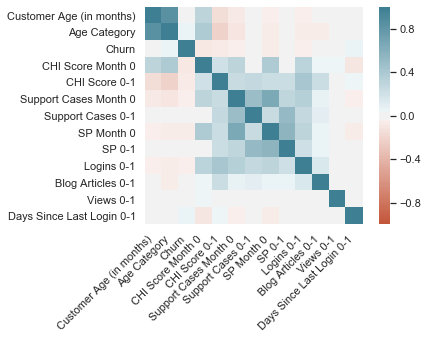

In [4]:
corr=data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#choose to drop Customer Age because of high correlation

In [5]:
data.head()
select=['Age Category','Churn', 
        'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0', 
        'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1', 'Blog Articles 0-1',
        'Views 0-1', 'Days Since Last Login 0-1']

data_final=data[select]
data_final['Age Category']=data_final['Age Category'].astype('category')
data_final

C:\App\Aconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age Category,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
ID,,,,,,,,,,,,
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,3,0.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,3,0.0,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,0.0
5,3,0.0,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6343,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6344,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6345,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6347 entries, 1 to 6347
Data columns (total 12 columns):
Age Category                 6347 non-null category
Churn                        6347 non-null float64
CHI Score Month 0            6347 non-null float64
CHI Score 0-1                6347 non-null float64
Support Cases Month 0        6347 non-null float64
Support Cases 0-1            6347 non-null float64
SP Month 0                   6347 non-null float64
SP 0-1                       6347 non-null float64
Logins 0-1                   6347 non-null float64
Blog Articles 0-1            6347 non-null float64
Views 0-1                    6347 non-null float64
Days Since Last Login 0-1    6347 non-null float64
dtypes: category(1), float64(11)
memory usage: 601.3 KB


*The variables affecting churn may be different for those who had been with the company different lengths of time*

*We use interaction to reflect the inflences of age*

In [7]:
#change Age Category to dummy variables
dummy = pd.get_dummies(data_final['Age Category'])
data_final = pd.concat([data_final, dummy], axis=1)

In [8]:
data_final

,Age Category,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,1,2,3
ID,,,,,,,,,,,,,,,
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,0,1
2,3,0.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0,0,0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,0,1
4,3,0.0,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,0.0,0,0,1
5,3,0.0,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
6344,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
6345,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [9]:
data_final=data_final.drop([1], axis=1)

data_final

,Age Category,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,2,3
ID,,,,,,,,,,,,,,
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,1
2,3,0.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0,0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,1
4,3,0.0,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,0.0,0,1
5,3,0.0,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6344,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6345,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [10]:
data_final.rename(columns={2:'AgeCat_2',3:'AgeCat_3'},inplace=True)

In [11]:
data_final.drop('Age Category',axis=1,inplace=True)

In [12]:
data_final

,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,AgeCat_2,AgeCat_3
ID,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,1
2,0.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,1
4,0.0,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,0.0,0,1
5,0.0,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [13]:
for i in ['AgeCat_2','AgeCat_3']:
    for k in data_final.columns[1:11]:
        data_final[i+"+"+k] = data_final[i]*data_final[k]

In [14]:
data_final.columns

Index(['Churn', 'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
       'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1',
       'Blog Articles 0-1', 'Views 0-1', 'Days Since Last Login 0-1',
       'AgeCat_2', 'AgeCat_3', 'AgeCat_2+CHI Score Month 0',
       'AgeCat_2+CHI Score 0-1', 'AgeCat_2+Support Cases Month 0',
       'AgeCat_2+Support Cases 0-1', 'AgeCat_2+SP Month 0', 'AgeCat_2+SP 0-1',
       'AgeCat_2+Logins 0-1', 'AgeCat_2+Blog Articles 0-1',
       'AgeCat_2+Views 0-1', 'AgeCat_2+Days Since Last Login 0-1',
       'AgeCat_3+CHI Score Month 0', 'AgeCat_3+CHI Score 0-1',
       'AgeCat_3+Support Cases Month 0', 'AgeCat_3+Support Cases 0-1',
       'AgeCat_3+SP Month 0', 'AgeCat_3+SP 0-1', 'AgeCat_3+Logins 0-1',
       'AgeCat_3+Blog Articles 0-1', 'AgeCat_3+Views 0-1',
       'AgeCat_3+Days Since Last Login 0-1'],
      dtype='object')

In [15]:
data_final
#We want to consider

,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,...,AgeCat_3+CHI Score Month 0,AgeCat_3+CHI Score 0-1,AgeCat_3+Support Cases Month 0,AgeCat_3+Support Cases 0-1,AgeCat_3+SP Month 0,AgeCat_3+SP 0-1,AgeCat_3+Logins 0-1,AgeCat_3+Blog Articles 0-1,AgeCat_3+Views 0-1,AgeCat_3+Days Since Last Login 0-1
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,0.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,...,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,0.0,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,...,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,0.0
5,0.0,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Deal with unbalanced data*

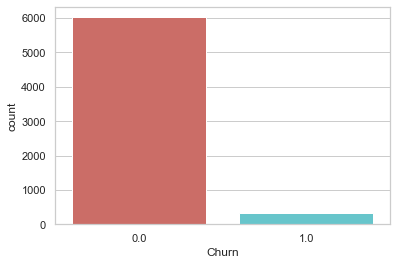

In [16]:
data_final['Churn'].value_counts()
sns.countplot(x='Churn', data=data_final, palette='hls')
#there are too many 0s in the sampple;
#need to deal with that.
#Always split into test and train sets BEFORE trying oversampling techniques! 

In [17]:

from sklearn.utils import resample

# Separate input features and target
y = data_final.Churn
X = data_final.drop('Churn', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_Churn = X[X.Churn==0]
Churn = X[X.Churn==1]

# upsample minority
Churn_upsampled = resample(Churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_Churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_Churn, Churn_upsampled])

# check new class counts
upsampled.Churn.value_counts()
y_train=upsampled['Churn']
X_train=upsampled.drop('Churn', axis=1)


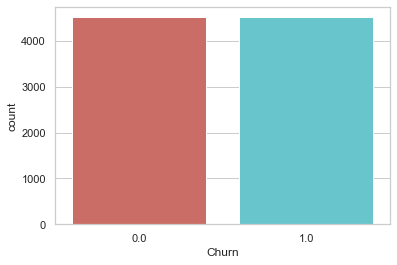

In [18]:
pd.DataFrame(y_train)["Churn"].value_counts()
#data_final['Churn'].value_counts()
sns.countplot(x='Churn', data=pd.DataFrame(y_train), palette='hls')
#sample balanced

*Now the sample is balanced*

# Modeling

*First try logistic regression*

*Feature selection*

*Drop because of high p-values*

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\App\Aconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\App\Aconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

[ True  True  True  True  True False False False False  True  True  True
 False False  True  True  True  True False False False False False  True
  True  True  True  True  True  True False  True]
[ 1  1  1  1  1  5  2  3 13  1  1  1  8  9  1  1  1  1  7  4 12  6 10  1
  1  1  1  1  1  1 11  1]


C:\App\Aconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

C:\App\Aconda\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Optimization terminated successfully.
         Current function value: 0.600489
         Iterations 6
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.134     
Dependent Variable:        Churn                 AIC:                   10901.6208
Date:                      2019-12-09 09:28      BIC:                   11129.0654
No. Observations:          9024                  Log-Likelihood:        -5418.8   
Df Model:                  31                    LL-Null:               -6255.0   
Df Residuals:              8992                  LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            6.0000                                                 
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------

In [21]:
X_train.columns

Index(['CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
       'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1',
       'Blog Articles 0-1', 'Views 0-1', 'Days Since Last Login 0-1',
       'AgeCat_2', 'AgeCat_3', 'AgeCat_2+CHI Score Month 0',
       'AgeCat_2+CHI Score 0-1', 'AgeCat_2+Support Cases Month 0',
       'AgeCat_2+Support Cases 0-1', 'AgeCat_2+SP Month 0', 'AgeCat_2+SP 0-1',
       'AgeCat_2+Logins 0-1', 'AgeCat_2+Blog Articles 0-1',
       'AgeCat_2+Views 0-1', 'AgeCat_2+Days Since Last Login 0-1',
       'AgeCat_3+CHI Score Month 0', 'AgeCat_3+CHI Score 0-1',
       'AgeCat_3+Support Cases Month 0', 'AgeCat_3+Support Cases 0-1',
       'AgeCat_3+SP Month 0', 'AgeCat_3+SP 0-1', 'AgeCat_3+Logins 0-1',
       'AgeCat_3+Blog Articles 0-1', 'AgeCat_3+Views 0-1',
       'AgeCat_3+Days Since Last Login 0-1'],
      dtype='object')

cols=['CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
       'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1',
        'Views 0-1', 'Days Since Last Login 0-1',
       'AgeCat_2', 'AgeCat_3',
       'AgeCat_2+CHI Score 0-1',
        'AgeCat_2+SP Month 0', 'AgeCat_2+SP 0-1',
       'AgeCat_2+Logins 0-1', 'AgeCat_2+Blog Articles 0-1',
       'AgeCat_2+Views 0-1', 'AgeCat_2+Days Since Last Login 0-1',
       'AgeCat_3+CHI Score Month 0', 'AgeCat_3+CHI Score 0-1',
        'AgeCat_3+Support Cases 0-1', 'AgeCat_3+SP 0-1', 'AgeCat_3+Logins 0-1',
       'AgeCat_3+Views 0-1',
       'AgeCat_3+Days Since Last Login 0-1']
#We drop several features

In [22]:
cols=['CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
       'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1',
        'Views 0-1', 'Days Since Last Login 0-1',
       'AgeCat_2', 'AgeCat_3', 
       'AgeCat_2+CHI Score 0-1', 
        'AgeCat_2+SP Month 0', 'AgeCat_2+SP 0-1',
       'AgeCat_2+Logins 0-1', 'AgeCat_2+Blog Articles 0-1',
       'AgeCat_2+Views 0-1', 'AgeCat_2+Days Since Last Login 0-1',
       'AgeCat_3+CHI Score Month 0', 'AgeCat_3+CHI Score 0-1',
        'AgeCat_3+Support Cases 0-1',
        'AgeCat_3+SP 0-1', 'AgeCat_3+Logins 0-1',
       'AgeCat_3+Views 0-1',
       'AgeCat_3+Days Since Last Login 0-1']

In [23]:
X_train=X_train[cols]
X_test=X_test[cols]
y_train=y_train
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.600855
         Iterations 6
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.133     
Dependent Variable:       Churn                  AIC:                    10894.2289
Date:                     2019-12-09 09:28       BIC:                    11071.9200
No. Observations:         9024                   Log-Likelihood:         -5422.1   
Df Model:                 24                     LL-Null:                -6255.0   
Df Residuals:             8999                   LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           6.0000                                                   
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

C:\App\Aconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.metrics import classification_report, accuracy_score


print(classification_report(y_test,prediction_test))  
print(metrics.accuracy_score(y_test, prediction_test))



              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77      1512
         1.0       0.06      0.44      0.10        75

    accuracy                           0.63      1587
   macro avg       0.51      0.54      0.43      1587
weighted avg       0.92      0.63      0.73      1587

0.62822936357908


*Random Forest*

In [26]:
#random forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions_forest = classifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, accuracy_score

print (metrics.accuracy_score(y_test, predictions_forest))
print(classification_report(y_test,predictions_forest))  



0.9332073093887838
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1512
         1.0       0.14      0.08      0.10        75

    accuracy                           0.93      1587
   macro avg       0.55      0.53      0.53      1587
weighted avg       0.92      0.93      0.92      1587



*# Obviously Random Forest is much better #*

In [28]:
classifier.predict_proba(X_test)

array([[0.86      , 0.14      ],
       [0.92      , 0.08      ],
       [0.92      , 0.08      ],
       ...,
       [0.465     , 0.535     ],
       [0.825     , 0.175     ],
       [0.94879295, 0.05120705]])

In [29]:
# To get the weights of all the variables
weights = pd.Series(classifier.feature_importances_,index=X_train.columns.values).sort_values(ascending = False)
weights

CHI Score Month 0                     0.116967
Days Since Last Login 0-1             0.114065
CHI Score 0-1                         0.107726
Views 0-1                             0.095528
Logins 0-1                            0.093197
AgeCat_2+Days Since Last Login 0-1    0.052873
AgeCat_3+CHI Score Month 0            0.050703
AgeCat_3+Views 0-1                    0.045334
AgeCat_3+Days Since Last Login 0-1    0.037704
AgeCat_3+CHI Score 0-1                0.035070
AgeCat_2+Views 0-1                    0.034518
AgeCat_3+Logins 0-1                   0.031929
AgeCat_2+CHI Score 0-1                0.031454
AgeCat_2+Logins 0-1                   0.028761
Support Cases 0-1                     0.023255
SP 0-1                                0.015881
Support Cases Month 0                 0.015813
AgeCat_2+Blog Articles 0-1            0.014445
AgeCat_2                              0.013986
AgeCat_3                              0.010736
SP Month 0                            0.008576
AgeCat_2+SP 0

No handles with labels found to put in legend.


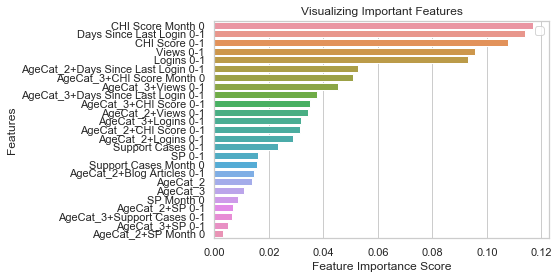

In [30]:
sns.barplot(x=weights, y=weights.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

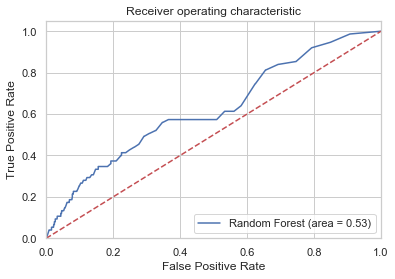

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
#our model performs better than random guess
#since the sample is so unblanced, we consider that as a acceptable result

# Now has the model, do the prediction

In [32]:
test_data=data_final[data_final.Churn==0][cols]
test_data.head()

,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Views 0-1,Days Since Last Login 0-1,AgeCat_2,...,AgeCat_2+Blog Articles 0-1,AgeCat_2+Views 0-1,AgeCat_2+Days Since Last Login 0-1,AgeCat_3+CHI Score Month 0,AgeCat_3+CHI Score 0-1,AgeCat_3+Support Cases 0-1,AgeCat_3+SP 0-1,AgeCat_3+Logins 0-1,AgeCat_3+Views 0-1,AgeCat_3+Days Since Last Login 0-1
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,62.0,4.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0,0,...,0.0,-0.0,0.0,62.0,4.0,0.0,0.0,0.0,-16.0,31.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,21996.0,0.0,0,...,-0.0,0.0,0.0,231.0,1.0,-1.0,0.0,167.0,21996.0,0.0
5,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0,0,...,0.0,0.0,0.0,43.0,-1.0,0.0,0.0,0.0,9.0,31.0


In [33]:
predictions_final = classifier.predict(test_data)
prob=classifier.predict_proba(test_data)[:, 1]

In [34]:
prob=prob.reshape(-1,1)
prob

array([[0.83890297],
       [0.02      ],
       [0.83890297],
       ...,
       [0.05120705],
       [0.05120705],
       [0.05120705]])

In [35]:
test_data['Churn_rate']=prob
test_data['class']=predictions_final

In [36]:
test_data.sort_values(by='Churn_rate', ascending=False).head(100)

,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Views 0-1,Days Since Last Login 0-1,AgeCat_2,...,AgeCat_2+Days Since Last Login 0-1,AgeCat_3+CHI Score Month 0,AgeCat_3+CHI Score 0-1,AgeCat_3+Support Cases 0-1,AgeCat_3+SP 0-1,AgeCat_3+Logins 0-1,AgeCat_3+Views 0-1,AgeCat_3+Days Since Last Login 0-1,Churn_rate,class
ID,,,,,,,,,,,,,,,,,,,,,
413,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-4.0,31.0,1,...,31.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,1.000000,1.0
1071,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,31.0,1.000000,1.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,31.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,31.0,0.966611,1.0
4477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.954078,1.0
3714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,1,...,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.940066,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,31.0,1,...,31.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.809432,1.0
312,61.0,1.0,0.0,0.0,0.0,0.0,2.0,-44.0,30.0,1,...,30.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.775000,1.0
3299,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,1,...,31.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.649160,1.0
